In [1]:
###### Importing all necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train_news.csv')
train.head()

Unnamed: 0     id                                           headline  \
0           0   9653  Ethics Questions Dogged Agriculture Nominee as...   
1           1  10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2           2  19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3           3   6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4           4   7596                       A Digital 9/11 If Trump Wins   

                   written_by  \
0  Eric Lipton and Steve Eder   
1             David Waldstein   
2                     Pam Key   
3                Jess Bidgood   
4           Finian Cunningham   

                                                news  label  
0  WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1  HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2  Sunday on ABC’s “This Week,” while discussing ...      0  
3  AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4    Finian Cunningham has written extensively on...      1

### Observation:
    . There catrgorical and numberical data
    . unnamed:0 is just It is a serial number we can drop that column
    . Id is Unique id of each news article
    . headline is the title of the news.
    . written_by represents the author of the news article
    . label It tells whether the news is fake (1) or not fake (0)
    . news contains the full text of the news article

In [3]:
print('train shape is ',train.shape)

train shape is  (20800, 6)


### Observation:
    The shape of data is 20800 rows and 6 columns

In [4]:
print('train info',train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20800 non-null  int64 
 1   id          20800 non-null  int64 
 2   headline    20242 non-null  object
 3   written_by  18843 non-null  object
 4   news        20761 non-null  object
 5   label       20800 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 975.1+ KB
train info None


In [5]:
#describe is useful to understand the summary of data.
print('train data Set descriptin',train.describe())

train data Set descriptin          Unnamed: 0            id         label
count  20800.000000  20800.000000  20800.000000
mean   10399.500000  10399.500000      0.500625
std     6004.587135   6004.587135      0.500012
min        0.000000      0.000000      0.000000
25%     5199.750000   5199.750000      0.000000
50%    10399.500000  10399.500000      1.000000
75%    15599.250000  15599.250000      1.000000
max    20799.000000  20799.000000      1.000000


Unnamed: 0       0
id               0
headline       558
written_by    1957
news            39
label            0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


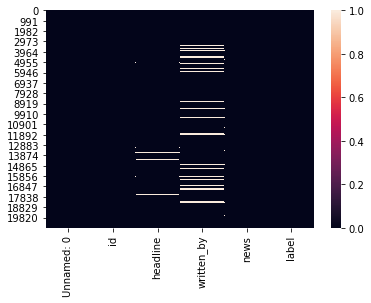

In [6]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

### Observation:
    There null values in Headline,weittrnby and news

In [7]:
# Handling nan values in dataset using empty spaces
def handle_nan(train_data):
    #Input: Data to the function containing Nan values.
    #Output : Cleaned data containing no Nan values.
    #Function: Cleaning Nan values.
    train  = train_data.fillna(" ")
    return train

train = handle_nan(train)

Unnamed: 0    0
id            0
headline      0
written_by    0
news          0
label         0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


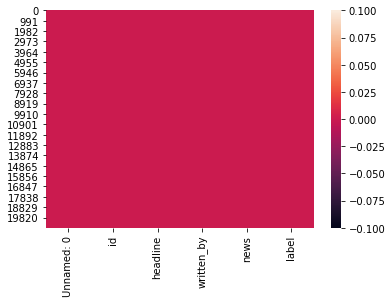

In [8]:
# checking null values
print(train.isnull().sum())
print(sns.heatmap(train.isnull()))

### Observation:
    We have replaced null with fillna function and Our data is all ready to model.

In [9]:
#Dropping Unnamed: 0 column using drop function
train=train.drop('Unnamed: 0',axis=1)

In [10]:
train.columns

Index(['id', 'headline', 'written_by', 'news', 'label'], dtype='object')

##### Observation:
    one column is dropped and 5 are remaining.label is our target variable.

In [11]:
# checking the skewness for the features:
train.skew()

id       0.0000
label   -0.0025
dtype: float64

### Observation:
    Data is moderately  skewed

            id    label
id     1.00000  0.00114
label  0.00114  1.00000
AxesSubplot(0.125,0.125;0.62x0.755)


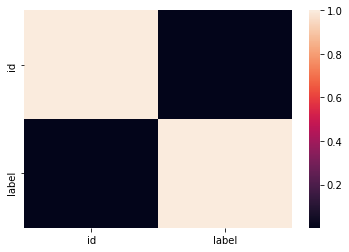

In [12]:
## checking correlation in dataset
print(train.corr())
print(sns.heatmap(train.corr()))

### Observation:
    Data is prefectly correlated.

In [13]:
train

id                                           headline  \
0       9653  Ethics Questions Dogged Agriculture Nominee as...   
1      10041  U.S. Must Dig Deep to Stop Argentina’s Lionel ...   
2      19113  Cotton to House: ’Do Not Walk the Plank and Vo...   
3       6868  Paul LePage, Besieged Maine Governor, Sends Co...   
4       7596                       A Digital 9/11 If Trump Wins   
...      ...                                                ...   
20795   5671                                                      
20796  14831        Albert Pike and the European Migrant Crisis   
20797  18142  Dakota Access Caught Infiltrating Protests to ...   
20798  12139  How to Stretch the Summer Solstice - The New Y...   
20799  15660  Emory University to Pay for ’100 Percent’ of U...   

                       written_by  \
0      Eric Lipton and Steve Eder   
1                 David Waldstein   
2                         Pam Key   
3                    Jess Bidgood   
4               Finian Cunningham   
...                           ...   
20795              NeverSurrender   
20796               Rixon Stewart   
20797                 Eddy Lavine   
20798              Alison S. Cohn   
20799                Tom Ciccotta   

                                                    news  label  
0      WASHINGTON  —   In Sonny Perdue’s telling, Geo...      0  
1      HOUSTON  —   Venezuela had a plan. It was a ta...      0  
2      Sunday on ABC’s “This Week,” while discussing ...      0  
3      AUGUSTA, Me.  —   The beleaguered Republican g...      0  
4        Finian Cunningham has written extensively on...      1  
...                                                  ...    ...  
20795  No, you'll be a dog licking of the vomit of yo...      1  
20796  By Rixon Stewart on November 5, 2016 Rixon Ste...      1  
20797  posted by Eddie You know the Dakota Access Pip...      1  
20798  It’s officially summer, and the Society Boutiq...      0  
20799  Emory University in Atlanta, Georgia, has anno...      0  

[20800 rows x 5 columns]

In [14]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import  stopwords
import string

In [15]:
list1=['headline', 'written_by', 'news',]
for i in list1:
    # Convert all messages to lower case
    train[i] = train[i].str.lower()

# Replace email addresses with 'email'
    train[i] = train[i].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
    train[i] = train[i].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
    train[i] = train[i].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
    train[i] = train[i].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
    train[i] = train[i].str.replace(r'\d+(\.\d+)?', 'numbr')


    train[i] = train[i].apply(lambda x: ' '.join(
        term for term in x.split() if term not in string.punctuation))

    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
    train[i] = train[i].apply(lambda x: ' '.join(
        term for term in x.split() if term not in stop_words))

    lem=WordNetLemmatizer()
    train[i] = train[i].apply(lambda x: ' '.join(
     lem.lemmatize(t) for t in x.split()))

### Observation:
    . Converted all messages to lower case
    . Replaced email addresses with 'email'
    . Replaced URLs with 'webaddress'
    . Replaced money symbols with 'moneysymb'
    . Replaced 10 digit phone number
    . Replaced numbers with 'numbr'

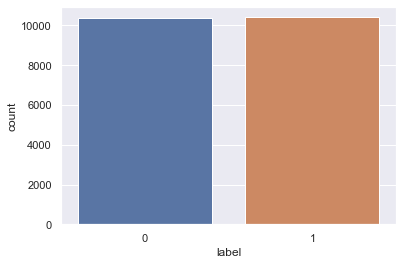

In [16]:
sns.set()
sns.countplot(x="label" , data = train)
plt.show()

### Observation:
    Both postive news and negative news are same in number.

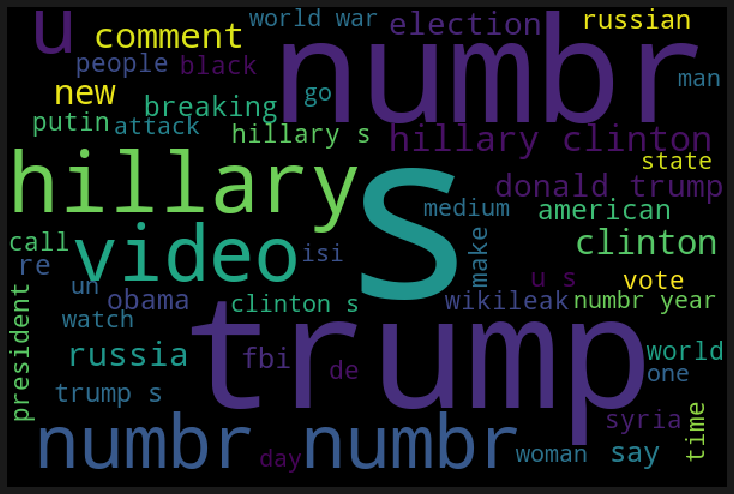

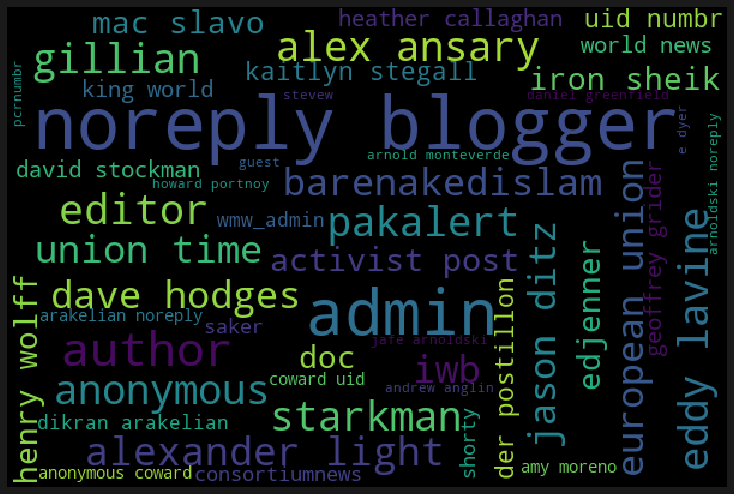

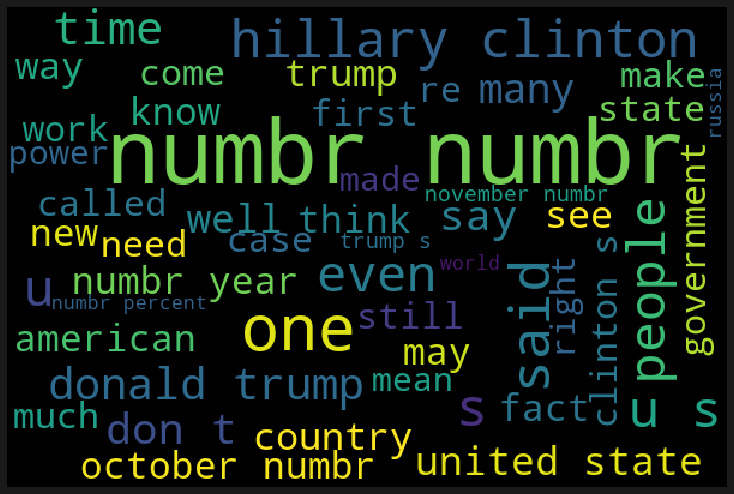

In [17]:
#Getting sense of loud words which are offensive
from wordcloud import WordCloud
list2=['headline', 'written_by', 'news']
for i in list2:
    hams = train[i][train['label']==1]
    spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(hams))
    plt.figure(figsize=(10,8),facecolor='k')
    plt.imshow(spam_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

### Observation:
    showing top 15 words in each column that makes news fake.

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

### Observation:
    Importing all modles for modeling

In [19]:
#Seprating into input and output variables
x=train.drop(['label'],axis=1)

In [20]:
y=pd.DataFrame(train['label'])

In [21]:
x.columns

Index(['id', 'headline', 'written_by', 'news'], dtype='object')

In [22]:
#  Convert text into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
list3=['headline', 'written_by', 'news']
tf_vec = TfidfVectorizer(max_features = 10000, stop_words='english')
for i in list3:
    features = tf_vec.fit_transform(train[i])
    x = features

### Observation:
    . Converted text into vectors using TF-IDF

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [24]:
y_train.shape,y_test.shape

((14560, 1), (6240, 1))

In [25]:
x_train.shape,x_test.shape

((14560, 10000), (6240, 10000))

In [26]:
# LogisticRegression
LG = LogisticRegression(C=1, max_iter = 3000)

LG.fit(x_train, y_train)

y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9683379120879121
Test accuracy is 0.9474358974358974
[[2891  191]
 [ 137 3021]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3082
           1       0.94      0.96      0.95      3158

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



### Observation:
    Train and test acuracy is good and almost equal i.e., 95%(approx)
    precision , recall , f1-score are also good.

In [27]:
# DecisionTreeClassifier
DT = DecisionTreeClassifier()

DT.fit(x_train, y_train)
y_pred_train = DT.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = DT.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999313186813187
Test accuracy is 0.8860576923076923
[[2718  364]
 [ 347 2811]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88      3082
           1       0.89      0.89      0.89      3158

    accuracy                           0.89      6240
   macro avg       0.89      0.89      0.89      6240
weighted avg       0.89      0.89      0.89      6240



### Observation:
    Train and test acuracy is good and but there is difference between test and train result.
    precision , recall , f1-score are also good.But Logistic Regression is better than DecisionTreeClassifier

In [28]:
#RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(x_train, y_train)
y_pred_train = RF.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = RF.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9999313186813187
Test accuracy is 0.9450320512820513
[[2935  147]
 [ 196 2962]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      3082
           1       0.95      0.94      0.95      3158

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



### Observation:
    Train and test acuracy is good and but there is difference between test and train result.
    precision , recall , f1-score are also good.But Logistic Regression is better than RandomForestClassifier

In [29]:
#AdaBoostClassifier
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(x_train, y_train)
y_pred_train = ada.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = ada.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9469093406593406
Test accuracy is 0.9450320512820513
[[2893  189]
 [ 154 3004]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.94      3082
           1       0.94      0.95      0.95      3158

    accuracy                           0.95      6240
   macro avg       0.95      0.94      0.95      6240
weighted avg       0.95      0.95      0.95      6240



### Observation:
    Train and test acuracy is good and train, test are almost equal i.e.,94%
    precision , recall , f1-score are also good.But Logistic Regression is better than AdaBoostClassifier

In [30]:
#KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(x_train, y_train)
y_pred_train = knn.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = knn.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))


Training accuracy is 0.5850961538461539
Test accuracy is 0.5714743589743589
[[ 431 2651]
 [  23 3135]]
              precision    recall  f1-score   support

           0       0.95      0.14      0.24      3082
           1       0.54      0.99      0.70      3158

    accuracy                           0.57      6240
   macro avg       0.75      0.57      0.47      6240
weighted avg       0.74      0.57      0.48      6240



### Observation:
    Train and test acuracy is average and train, test are almost equal i.e.,58%
    precision , recall , f1-score are also good.But Logistic Regression is better than KNeighborsClassifier

In [31]:
# RandomForestClassifier
LG = LogisticRegression(C=1, max_iter = 3000)
LG.fit(x_train, y_train)
y_pred_train = LG.predict(x_train)
print('Training accuracy is {}'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test = LG.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test,y_pred_test)))
cvs=cross_val_score(LG, x, y, cv=10, scoring='accuracy').mean()
print('cross validation score :',cvs*100)
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9683379120879121
Test accuracy is 0.9474358974358974
cross validation score : 94.80288461538461
[[2891  191]
 [ 137 3021]]
              precision    recall  f1-score   support

           0       0.95      0.94      0.95      3082
           1       0.94      0.96      0.95      3158

    accuracy                           0.95      6240
   macro avg       0.95      0.95      0.95      6240
weighted avg       0.95      0.95      0.95      6240



### Observation:
    . Selecting Logistic regression as our best model
    . Preformig cross_val_score is avoid over fitting or under fitting.

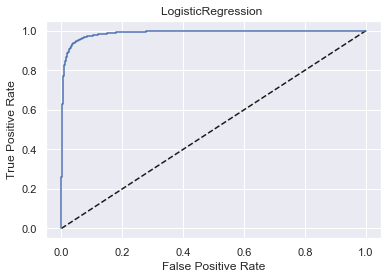

0.988563597739474


In [35]:
#Plotting the graph which tells us about the area under curve , more the area under curve more will be the better prediction
# model is performing good :
#AUC_ROC curve and finding auc score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=LG.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LogisticRegression ')
plt.show()

auc_score=roc_auc_score(y_test,y_pred_prob)
print(auc_score)

### Observtion:
    As we can see above 98% is our model AUO_ROC score.

In [36]:
import warnings
warnings.filterwarnings('ignore')
import eli5
eli5.show_weights(LG,vec = tf_vec, top = 15) 
# will give you top 15 features or words  which makes a news fake

### Observation:
    It will give you top 15 features or words  which makes a news fake

In [46]:
### since we have train and test results , I am saving both results
prediction=(y_pred_train)
prediction

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

In [47]:
pred=pd.DataFrame(prediction)

In [48]:
prediction1=(y_pred_test)
prediction1

array([0, 0, 1, ..., 1, 0, 1], dtype=int64)

In [49]:
pred1=pd.DataFrame(prediction1)

In [50]:
pred.head()

0
0  1
1  0
2  1
3  0
4  0

In [51]:
pred1.head()

0
0  0
1  0
2  1
3  1
4  0

In [52]:
pred.to_csv('fake_news_Train_result.csv')

In [53]:
pred1.to_csv('fake_news_Test_result.csv')

### Observation:
    Saved both train and test results in CSV files.